In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 16 20:09:30 2020

@author: Arun
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

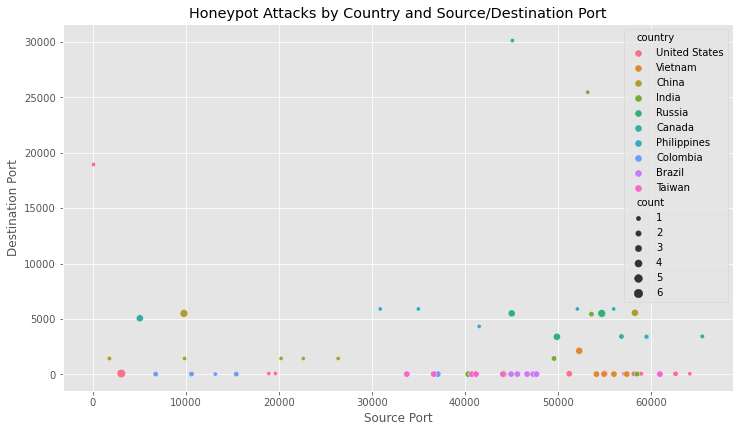

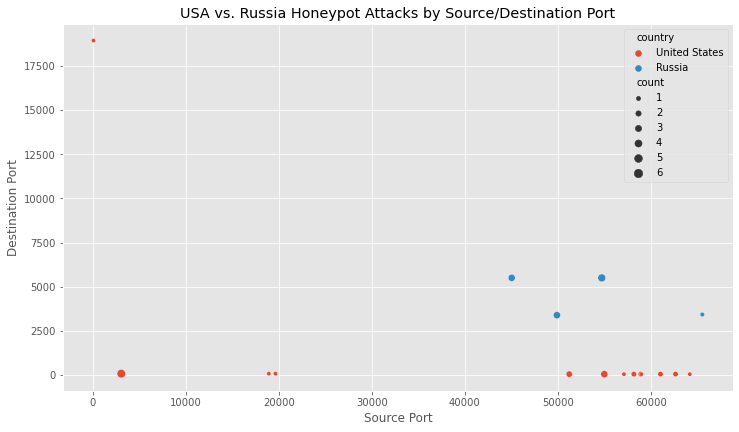

In [3]:
#scatter plots of attack data-------------------------------------------------
final = pd.read_csv('all_countries.csv')
us_and_russia = pd.read_csv('us_and_russia.csv')

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='src_port',y='dest_port',data=final,hue='country',\
                    size='count',legend='brief')
_ = plt.xlabel('Source Port')
_ = plt.ylabel('Destination Port')
_ = plt.title('Honeypot Attacks by Country and Source/Destination Port')
plt.show()

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='src_port',y='dest_port',data=us_and_russia,\
                    hue='country',size='count',legend='brief')
_ = plt.xlabel('Source Port')
_ = plt.ylabel('Destination Port')
_ = plt.title('USA vs. Russia Honeypot Attacks by Source/Destination Port')
plt.show()

In [4]:
#K-Nearest-Neighbors Classifier-------------------------------------------

#all countries
X_train, X_test, y_train, y_test = \
    train_test_split(final[['src_port','dest_port']],\
                     final['country'],test_size=0.3,\
                         random_state=21,stratify=final['country'])

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print('\n')
print(y_pred)
score = knn.score(X_test,y_test)
print('\n')
print(score)
print('\n')



['China' 'China' 'Taiwan' 'United States' 'United States' 'Taiwan'
 'Colombia' 'Brazil' 'China' 'Russia' 'United States' 'Colombia' 'Vietnam'
 'Philippines' 'Brazil' 'Russia' 'Vietnam' 'Russia' 'Brazil' 'Russia'
 'Brazil' 'Philippines' 'Philippines']


0.5217391304347826




In [5]:
#only USA and Russia
usa = us_and_russia[us_and_russia['country'] == 'United States']
russia = us_and_russia[us_and_russia['country'] == 'Russia']

#pearson coefficients of correlation for source and destination ports
rho1 = np.corrcoef(usa['src_port'],russia['src_port'],rowvar=False)
rho2 = np.corrcoef(usa['dest_port'],russia['dest_port'],rowvar=False)
print(rho1)
print('\n')
print(rho2)

X_train, X_test, y_train, y_test = \
    train_test_split(us_and_russia[['src_port','dest_port']],\
                     us_and_russia['country'],test_size=0.3,\
                         random_state=21,\
                             stratify=us_and_russia['country'])

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print('\n')
print(y_pred)
score = knn.score(X_test,y_test)
print('\n')
print(score)

[[1.         0.87843095]
 [0.87843095 1.        ]]


[[1.         0.67797432]
 [0.67797432 1.        ]]


['United States' 'United States' 'United States' 'Russia' 'United States'
 'United States' 'Russia' 'Russia']


0.875
